In [1]:
import os
import torch
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import albumentations as A
from albumentations.pytorch import ToTensorV2

from dretino.dataloader.utils import CustomDataset
from torch.utils.data import DataLoader

In [2]:
PATH = '../data/processed/'
df = pd.read_csv(PATH + '2.Groundtruths/a.IDRiD_Disease_Grading_Training_Labels.csv')

train_data = CustomDataset(df,
                           PATH+'images_resized',
                           transform=A.Compose([
                                   A.Resize(width=224, height=224),
                                   A.Normalize(mean=(0,0,0),
                                               std =(1,1,1)),
                                   ToTensorV2()
                            ]))

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              num_workers=4,
                              shuffle=False)

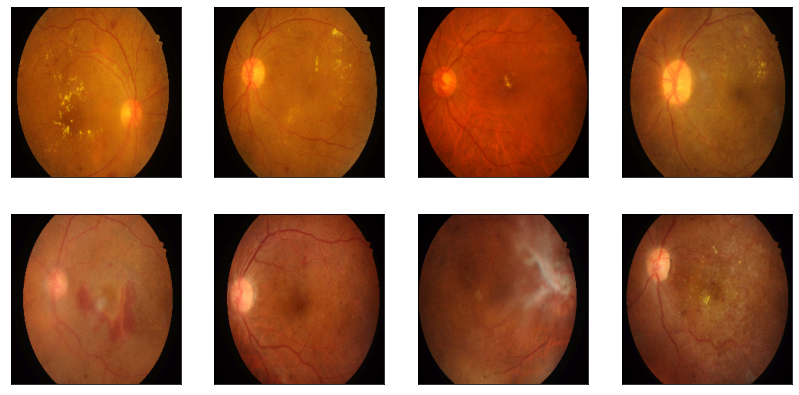

In [3]:
for batch_idx, inputs in enumerate(train_dataloader):
    fig = plt.figure(figsize = (14, 7))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])     
        plt.imshow(inputs[0][i].numpy().transpose(1, 2, 0))
    break

In [4]:
psum    = torch.tensor([0.0, 0.0, 0.0])
psum_sq = torch.tensor([0.0, 0.0, 0.0])

for inputs,_ in tqdm(train_dataloader):
    psum    += inputs.sum(axis        = [0, 2, 3])
    psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

100%|██████████| 13/13 [00:38<00:00,  2.93s/it]


In [5]:
count = len(df) * 224 * 224

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = torch.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

mean: tensor([0.5237, 0.2542, 0.0853])
std:  tensor([0.2649, 0.1497, 0.0876])


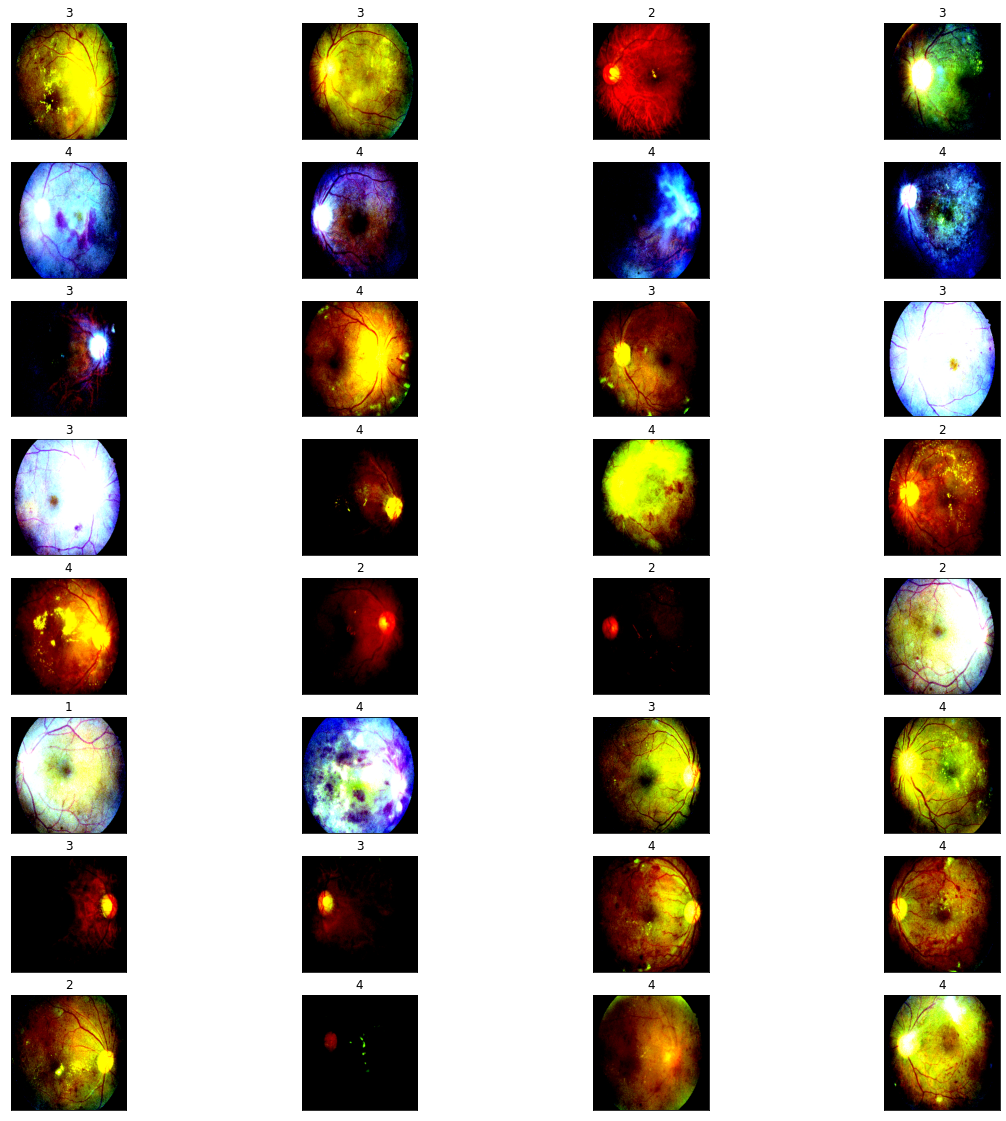

In [10]:
train_data = CustomDataset(df,
                           PATH+'images_resized',
                           transform=A.Compose([
                                   A.Resize(width=224, height=224),
                                   A.Normalize(mean=(0.5237, 0.2542, 0.0853),
                                               std =(0.2649, 0.1497, 0.0876)),
                                    # A.Normalize(mean=(0.5211, 0.2514, 0.0809),
                                    #            std =(0.2653, 0.1499, 0.0861)),
                                   ToTensorV2()
                            ]))

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              num_workers=4,
                              shuffle=False)

for batch_idx, (inputs,label) in enumerate(train_dataloader):
    fig = plt.figure(figsize = (20, 20))
    plt.tight_layout()
    try:
        for i in range(32):
            ax = fig.add_subplot(8, 4, i + 1, xticks = [], yticks = [])  
            plt.imshow(inputs[i].numpy().transpose(1, 2, 0))
            plt.title(str(np.argmax(label[i].numpy()))) 
        plt.savefig(str(batch_idx)+'.png')
    except IndexError:
        for i in range(29):
            ax = fig.add_subplot(8, 4, i + 1, xticks = [], yticks = [])     
            plt.imshow(inputs[i].numpy().transpose(1, 2, 0))
            plt.title(str(np.argmax(label[i].numpy())))
        plt.savefig(str(batch_idx)+'.png')
    break
plt.show()